In [1]:
import pandas as pd
import numpy as np
#import missingno as msn
import seaborn as sns

from sklearn.model_selection import train_test_split

RSEED = 42

In [2]:
df = pd.read_csv('data/train.csv')
df_variableDefinitions = pd.read_csv('data/variabledefinitions.csv')

## Preprocessing


In [3]:
# Replace missing values in travel_with where people traveled alone
df.loc[(df.travel_with.isna()) & (df[['total_male', 'total_female']].sum(axis=1) == 1), 'travel_with'] = 'Alone'

# Drop missing values in travel_with where we can't impute the missing values
df_new = df.dropna(subset=['travel_with'])
df_new.shape
# df[(df.travel_with.isna()) & (df[['total_male', 'total_female']].sum(axis=1) == 1)]

(4780, 23)

In [4]:
# Drop observations in total_male and total_female that dont contain values
indices_drop = df_new[(df_new['total_female'] == 0) & (df_new['total_male'] == 0)].index
df_new = df_new.drop(indices_drop, axis=0)

In [5]:
# Replace missing values in most_impressing with 'No comments'
df_new['most_impressing'] = df_new['most_impressing'].fillna('No comments')

In [6]:
# Replace missing values in most_impressing with 'No comments'
df_new['most_impressing'].replace(' Wildlife', 'Wildlife', inplace=True)
#print(df_new['most_impressing'].value_counts())


In [7]:
# Drop remaining Nan's in total_female and total_male
df_new = df_new.dropna()


In [8]:
df_new.drop(['ID'], axis=1, inplace=True)

In [9]:
df_new.shape

(4759, 22)

### F**k the  Outliers

In [10]:
# Computing Q1, Q3, and IQR
q1 = df_new['total_cost'].quantile(0.25)
q3 = df_new['total_cost'].quantile(0.75)

iqr = q3 - q1

In [11]:
# Final dataset without outliers
df_new = df_new.query('(@q1 - 1.5 * @iqr) <= @df_new["total_cost"] <= (@q3 + 1.5 * @iqr)')
df_new.to_csv('data/the_data_we_work_with.csv')

## Dummy encoding!

In [12]:
df_new.head(5)
#df_new.shape

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,CHINA,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [13]:
X = df_new.drop(['total_cost'], axis=1)
y = df_new.pop('total_cost')

In [14]:
X = pd.get_dummies(X, drop_first=True)
X

,total_female,total_male,night_mainland,night_zanzibar,country_ANGOLA,country_ARGENTINA,country_AUSTRALIA,country_AUSTRIA,country_BELGIUM,country_BERMUDA,...,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,first_trip_tz_Yes,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_Satisfies and Hope Come Back,most_impressing_Wildlife,"most_impressing_Wonderful Country, Landscape, Nature"
0,1.0,1.0,13.0,0.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,1.0,0.0,14.0,7.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0.0,1.0,1.0,31.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,1.0,11.0,0.0,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,1.0,0.0,7.0,4.0,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,0.0,1.0,2.0,0.0,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
4805,1.0,1.0,11.0,0.0,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4806,1.0,0.0,3.0,7.0,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
4807,1.0,1.0,5.0,0.0,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


## Split Data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

In [41]:
#df.total_cost.mean()
#print((y_train.mean())*0.00036)

### Scaling & Applying Min Max

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

num_features = ['total_female', 'total_male', 'night_mainland', 'night_zanzibar']
scaler = StandardScaler()
df_new[num_features] = scaler.fit_transform(df_new[num_features])


## Modelling

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [17]:
regressors = [LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor()]

### Simple Models with default values

In [19]:
len(y_test)

1298

In [20]:

def model_tester(X_train, y_train, X_test, regressor):
    '''
    Run multiple regression models and print evaluation metrics per model
    '''
    model = regressor
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(str(regressor).strip('()'))

    if 'tree' in str(regressor).lower():
        print("Tree Depths: " , model.get_depth())
        print("Number of leaves: " , model.get_n_leaves(), "\n")

    if 'linear' in str(regressor).lower():
        pass

    if 'neighbors' in str(regressor).lower():
        pass

    print("MSE: " , np.round(mean_squared_error(y_test, prediction), 2))
    print("MAE: " , np.round(mean_absolute_error(y_test, prediction), 2))
    print("RSquared: " , np.round(r2_score(y_test, prediction), 2))
    print("RSquared (adjusted): ", np.round(1 - ( 1 - r2_score(y_test, prediction) ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 ), 2))
    
    print("---"*10)

for reg in regressors:
    model_tester(X_train, y_train, X_test, reg)

LinearRegression
MSE:  3.6090612199412876e+32
MAE:  1325245955417456.5
RSquared:  -1.121360279326998e+19
RSquared (adjusted):  -1.2702220806001013e+19
------------------------------
KNeighborsRegressor
MSE:  20157901784958.76
MAE:  2973477.36
RSquared:  0.37
RSquared (adjusted):  0.29
------------------------------
DecisionTreeRegressor
Tree Depths:  40
Number of leaves:  2869 

MSE:  32821736842542.56
MAE:  3677793.65
RSquared:  -0.02
RSquared (adjusted):  -0.16
------------------------------


## Thoughts

### Ideas
- Residual plots for predictions
    - For a good model we expect a random distribution of residuals
    - Patterns in our residuals are a sign of underfitting

### KNN
- Manhattan Distance (Minkowski p=1 / L1-norm, Taxicab or Cityblock distance) is better for sparse data (high dimensional data).
 - Sparse data contains many zeros e.g. as a result of dummy encoded categorical data  

### Hypotheses about our models (out of the box)
- Linear Regression
    - Prone to underfitting
    - High Bias and low Variance
- Decision Trees
    - Prone to overfitting
    - Low Bias but high variance
- KNN
    - Prone to overfitting
    - Low Bias but high variance

### KNearest Neighbor

In [21]:
# Importing libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from math import sqrt
import numpy as np

In [22]:
# Define the KNeighborsRegressor model
knn_regressor = KNeighborsRegressor(n_neighbors=15)

# Assuming the model_tester function is as defined earlier
model_tester(X_train, y_train, X_test, knn_regressor)

KNeighborsRegressor(n_neighbors=15
MSE:  18792240422850.9
MAE:  2902626.37
RSquared:  0.42
RSquared (adjusted):  0.34
------------------------------


Optimal number of neighbors: 19


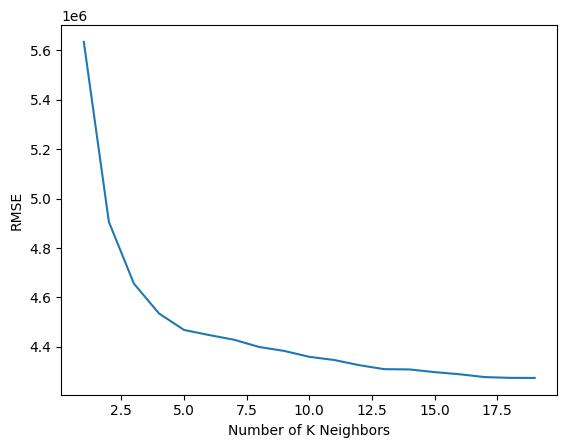

In [23]:
# Listing the different values for n_neighbors
neighbors_range = range(1, 20)

# Creating an empty list to store RMSE values
rmse_values = []

# Performing 5-fold cross-validation
for n in neighbors_range:
    knn = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=n))
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_values.append(sqrt(-np.mean(scores)))

# Finding the value of n_neighbors that gives the lowest RMSE
optimal_n = neighbors_range[rmse_values.index(min(rmse_values))]
print(f"Optimal number of neighbors: {optimal_n}")

# Plotting the RMSE values for different n_neighbors
import matplotlib.pyplot as plt

plt.plot(neighbors_range, rmse_values)
plt.xlabel('Number of K Neighbors')
plt.ylabel('RMSE')
plt.show()

In [24]:
# Retraining the model with the optimal number of neighbors
optimal_knn = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=optimal_n))
optimal_knn.fit(X_train, y_train)

# Using the trained model for predictions
predictions = optimal_knn.predict(X_test)

In [25]:
# Converting RMSE value to Euros
#print(test_rmse*0.00036)

In [26]:
#rmse = mean_squared_error(y_test, predictions, squared=False)
#print(f"RMSE: {rmse}")

In [27]:
# Defining MPE calculation function
def calc_mpe(y_true, y_predicted):
    mpe = np.mean(np.power((y_true-y_predicted)/y_true, 2))*100
    mpe = np.sqrt(mpe)
    return mpe

In [28]:
# Optimal KNN
knn_rmse = sqrt(mean_squared_error(y_test, predictions))
knn_mae = mean_absolute_error(y_test, predictions)
knn_mpe = calc_mpe(y_test, predictions)

print(f"Standalone KNN:\nTest RMSE: {knn_rmse}\nTest MAE: {knn_mae}\nTest MPE: {round(knn_mpe,3)}%")

Standalone KNN:
Test RMSE: 4440110.564690394
Test MAE: 3021877.400091152
Test MPE: 114.63%


### Using Bagging to Improve Performance

In [29]:
from sklearn.ensemble import BaggingRegressor

# Enhancing KNN with Bagging
bagging_model = BaggingRegressor(estimator=optimal_knn, n_estimators=4, random_state=42)

# Fitting the Bagging model
bagging_model.fit(X_train, y_train)

# Making predictions on the test set
predictions_bagging = bagging_model.predict(X_test)

# Calculating RMSE for the Bagging-enhanced KNN model
test_rmse_bagging = sqrt(mean_squared_error(y_test, predictions_bagging))

'''# RMSE to compare both models 
print(f"Test RMSE for standalone KNN: {test_rmse}")
print(f"Test RMSE for Bagging-enhanced KNN: {test_rmse_bagging}")

# Calculating difference between RMSE's
rmse_difference = test_rmse - test_rmse_bagging
print(f"Difference in RMSE: {rmse_difference}")
'''

'# RMSE to compare both models \nprint(f"Test RMSE for standalone KNN: {test_rmse}")\nprint(f"Test RMSE for Bagging-enhanced KNN: {test_rmse_bagging}")\n\n# Calculating difference between RMSE\'s\nrmse_difference = test_rmse - test_rmse_bagging\nprint(f"Difference in RMSE: {rmse_difference}")\n'

In [30]:
bagging_rmse = sqrt(mean_squared_error(y_test, predictions_bagging))
bagging_mae = mean_absolute_error(y_test, predictions_bagging)
bagging_mpe = calc_mpe(y_test, predictions_bagging)

print(f"Bagging-enhanced KNN:\nTest RMSE: {bagging_rmse}\nTest MAE: {bagging_mae}\nTest MPE: {round(bagging_mpe,3)}%")

Bagging-enhanced KNN:
Test RMSE: 4441983.156785561
Test MAE: 3033108.259853803
Test MPE: 112.617%


In [31]:
# Converting RMSE value to Euros
#print(test_rmse*0.00036)
print(test_rmse_bagging*0.00036)

1599.113936442802


In [32]:
# Boosted MPE 
boosted_mpe = calc_mpe(y_test, predictions)

print(f"Boosted MPE: {boosted_mpe}%")

Boosted MPE: 114.6301557060343%


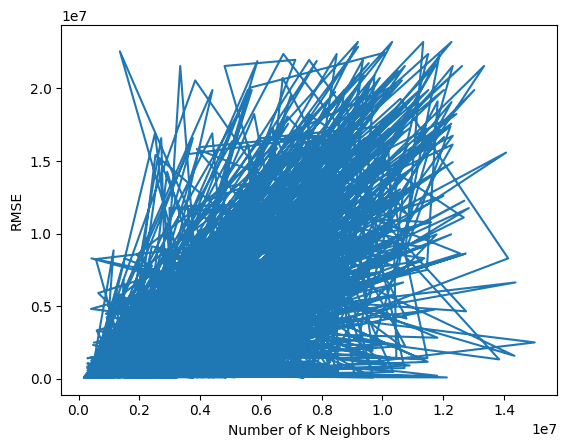

In [33]:
import matplotlib.pyplot as plt
plt.plot(predictions, y_test)
plt.xlabel('Number of K Neighbors')
plt.ylabel('RMSE')
plt.show()

<Axes: ylabel='total_cost'>

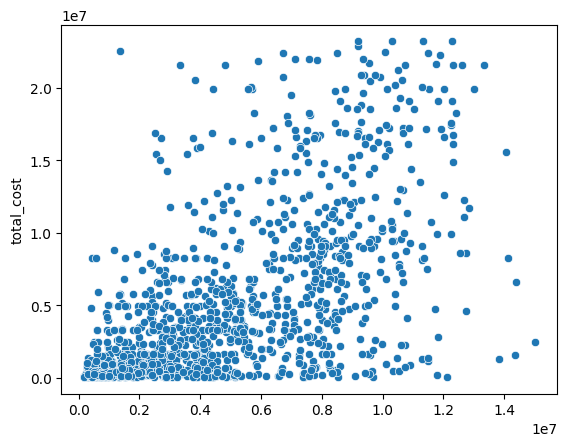

In [34]:
import seaborn as sns

sns.scatterplot(x=predictions, y=y_test, markers=True, legend='auto')

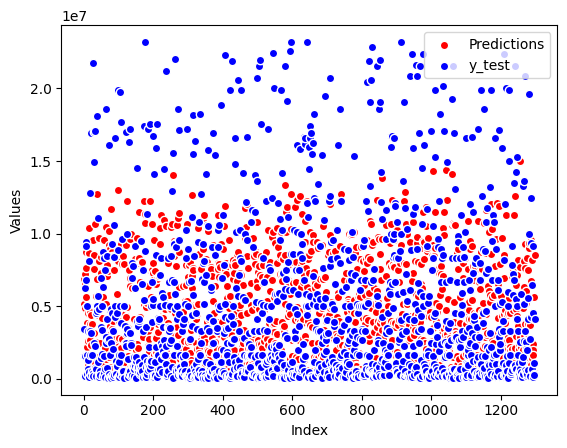

In [35]:
# First scatter plot for Predictions in red
plt.scatter(np.arange(len(predictions)), predictions, color='red', marker='o', edgecolor='w', label='Predictions')

# Second scatter plot for y_test in blue
plt.scatter(np.arange(len(y_test)), y_test, color='blue', marker='o', edgecolor='w', label='y_test')

plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

/var/folders/3r/65cz0ncj42375zk6tyvqgzk00000gn/T/ipykernel_19866/3096159056.py:2: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(range(len(predictions)), predictions, marker='x', c='red', edgecolor='w', label='Predictions')


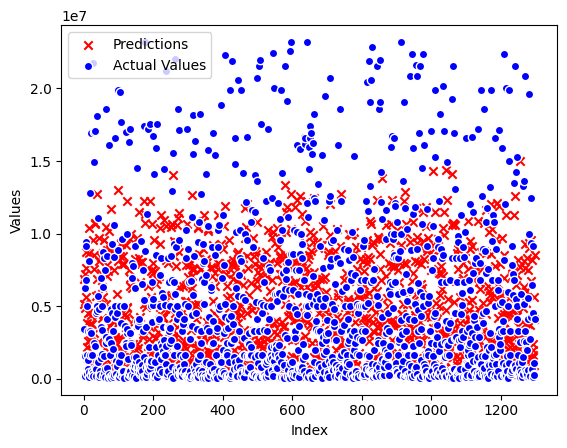

In [36]:
# Scatter plot for 'predictions' in red
plt.scatter(range(len(predictions)), predictions, marker='x', c='red', edgecolor='w', label='Predictions')

# Scatter plot for 'y_test' in blue
plt.scatter(range(len(y_test)), y_test, marker='o', c='blue', edgecolor='w', label='Actual Values')

plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define a pipeline that includes scaling and the KNN model
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Define the parameter grid to search over
param_grid = {'knn__n_neighbors': range(1, 20)}

# Set up GridSearchCV
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters for KNN:", grid_search.best_params_)

# Use the best estimator to make predictions
predictions = grid_search.best_estimator_.predict(X_test)

# Calculate evaluation metrics here as needed


Best parameters for KNN: {'knn__n_neighbors': 19}


In [38]:
from sklearn.ensemble import BaggingRegressor
import warnings
warnings.filterwarnings('ignore')

# Define a pipeline with Bagging and KNN
bagging_knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('bagging_knn', BaggingRegressor(base_estimator=KNeighborsRegressor(), random_state=42))
])

# Define the parameter grid
param_grid_bagging = {
    'bagging_knn__base_estimator__n_neighbors': range(1, 20),
    'bagging_knn__n_estimators': [5, 20]  # Example values
}

# Set up GridSearchCV for the Bagging model
grid_search_bagging = GridSearchCV(bagging_knn_pipeline, param_grid_bagging, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search_bagging.fit(X_train, y_train)

# Print the best parameters
print("Best parameters for Bagging with KNN:", grid_search_bagging.best_params_)

# Use the best estimator from bagging to make predictions
predictions_bagging = grid_search_bagging.best_estimator_.predict(X_test)

# Calculate evaluation metrics for the optimized bagging model here as needed


Best parameters for Bagging with KNN: {'bagging_knn__base_estimator__n_neighbors': 19, 'bagging_knn__n_estimators': 20}


In [39]:
bagging_rmse = sqrt(mean_squared_error(y_test, predictions_bagging))
bagging_mae = mean_absolute_error(y_test, predictions_bagging)
bagging_mpe = calc_mpe(y_test, predictions_bagging)

print(f"Bagging-enhanced KNN:\nTest RMSE: {bagging_rmse}\nTest MAE: {bagging_mae}\nTest MPE: {round(bagging_mpe,3)}%")

Bagging-enhanced KNN:
Test RMSE: 4444850.785654083
Test MAE: 3037462.6531980257
Test MPE: 115.812%


#### LS

In [40]:
#pip install xgboost

#### XBG Regressor

In [41]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [42]:
xgb_model = XGBRegressor()

In [43]:
parameters = {'learning_rate': [0.01, 0.02, 0.025, 0.03, 0.035, 0.04],
                'subsample'    : [0.9, 0.5, 0.2, 0.1],
                'n_estimators' : [50, 100, 200],
                'max_depth'    : [3,4,5,6]
                }

In [44]:
grid_GBR = GridSearchCV(estimator=xgb_model, param_grid=parameters, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.025, 0.03, 0.035,
                                           0.04],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.9, 0.5, 0.2, 0.1]},
             scoring='neg_root_mean_squared_error')

In [45]:
y_pred = grid_GBR.predict(X_test)

In [46]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best RMSE (EUR) across ALL searched params:\n",np.round(grid_GBR.best_score_*0.00036))
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

 The best RMSE (EUR) across ALL searched params:
 -1463.0

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 200, 'subsampl

In [47]:
mse = np.power(grid_GBR.best_score_, 2)
mse

16523048428852.076

In [48]:
def calc_mpe(y_true, y_predicted):
    mpe = np.mean(np.power((y_true-y_predicted)/y_true, 2))*100
    mpe = np.sqrt(mpe)
    return mpe

In [49]:
calc_mpe(y_test, y_pred)

110.27311110049817

### Error Analysis 

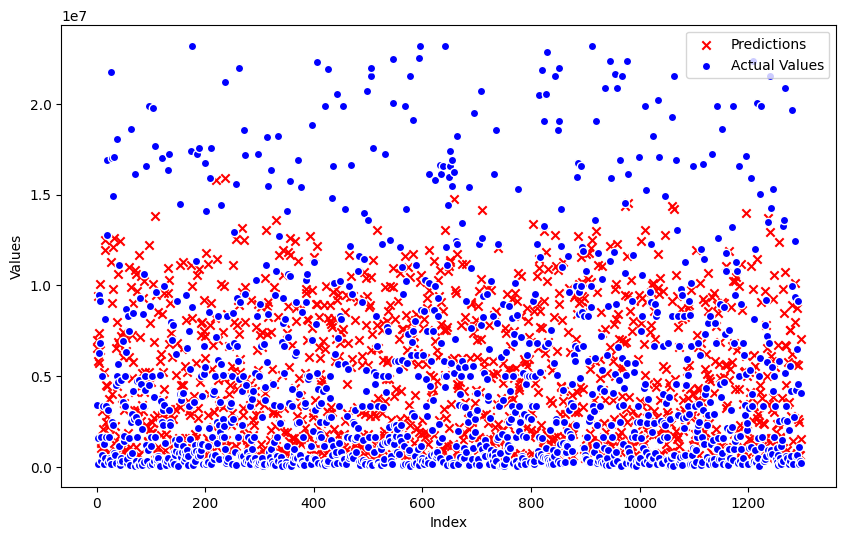

In [50]:
plt.figure(figsize = (10,6))
# Scatter plot for 'predictions' in red
plt.scatter(range(len(y_pred)), y_pred, marker='x', c='red', edgecolor='w', label='Predictions')

# Scatter plot for 'y_test' in blue
plt.scatter(range(len(y_test)), y_test, marker='o', c='blue', edgecolor='w', label='Actual Values')

plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

In [51]:
A = pd.DataFrame({'y_test': y_test.values, 'y_pred': y_pred})#.reset_index(inplace=False)
pd.options.display.float_format = '{:.2f}'.format
A['residuals'] = A['y_test'] - A['y_pred']
A

,y_test,y_pred,residuals
0,1588531.00,6968773.50,-5380242.50
1,3403995.00,6530535.00,-3126540.00
2,165750.00,9380799.00,-9215049.00
3,1588531.00,5830039.00,-4241508.00
4,6259110.00,5702249.50,556860.50
...,...,...,...
1293,131000.00,666372.81,-535372.81
1294,1093950.00,2462066.50,-1368116.50
1295,310000.00,653210.31,-343210.31
1296,226933.00,1550452.25,-1323519.25


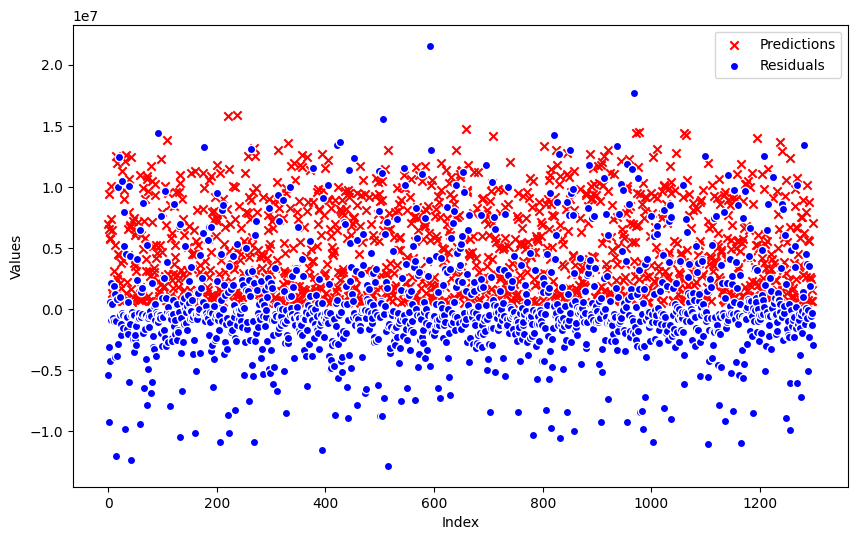

In [52]:
plt.figure(figsize = (10,6))
# Scatter plot for 'predictions' in red
plt.scatter(range(len(A.y_pred)), A.y_pred, marker='x', c='red', edgecolor='w', label='Predictions')

# Scatter plot for 'y_test' in blue
plt.scatter(range(len(A.residuals)), A.residuals, marker='o', c='blue', edgecolor='w', label='Residuals')

plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler

# Initialize a scaler
scaler = StandardScaler()
# Construct a sample DataFrame
A['residuals_std'] = scaler.fit_transform(np.array(A['residuals']).reshape(-1, 1))
A

,y_test,y_pred,residuals,residuals_std
0,1588531.00,6968773.50,-5380242.50,-1.30
1,3403995.00,6530535.00,-3126540.00,-0.76
2,165750.00,9380799.00,-9215049.00,-2.22
3,1588531.00,5830039.00,-4241508.00,-1.02
4,6259110.00,5702249.50,556860.50,0.13
...,...,...,...,...
1293,131000.00,666372.81,-535372.81,-0.14
1294,1093950.00,2462066.50,-1368116.50,-0.34
1295,310000.00,653210.31,-343210.31,-0.09
1296,226933.00,1550452.25,-1323519.25,-0.32


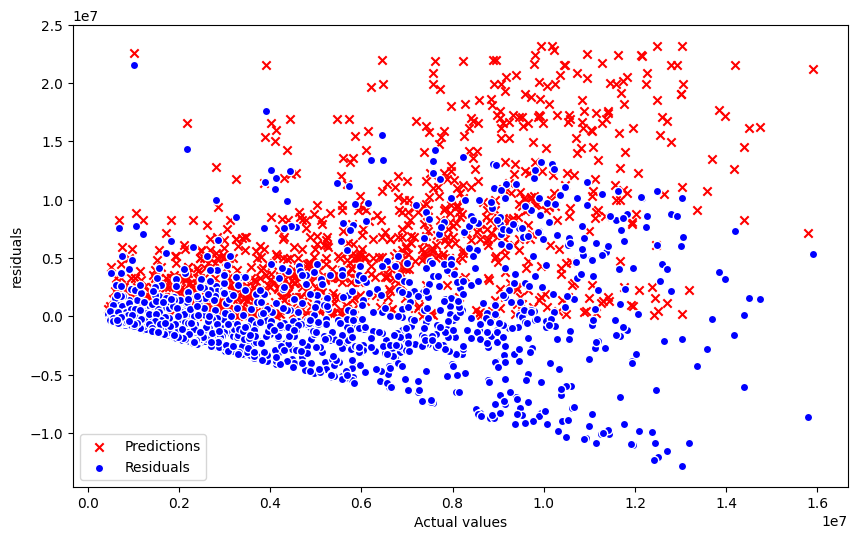

In [67]:
plt.figure(figsize = (10,6))
# Scatter plot for 'predictions' in red
plt.scatter(A.y_pred, A.y_test, marker='x', c='red', edgecolor='w', label='Predictions')

# Scatter plot for 'y_test' in blue
plt.scatter(A.y_pred, A.residuals, marker='o', c='blue', edgecolor='w', label='Residuals')

#plt.scatter(A.y_test, A.residuals_std, marker='o', c ='blue', edgecolors='w', label='residuals')
plt.xlabel('Actual values')
plt.ylabel('residuals')
plt.legend()
plt.show()

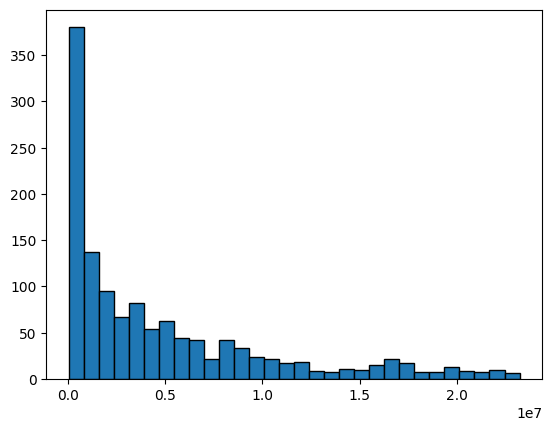

In [66]:
plt.hist(A.y_test, bins=30, edgecolor = 'black')

plt.show()

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Replace 'age_group' and 'main_activity' with your actual column names if they differ
cross_tab = pd.crosstab(df['main_activity'], df['age_group'])

print(cross_tab)

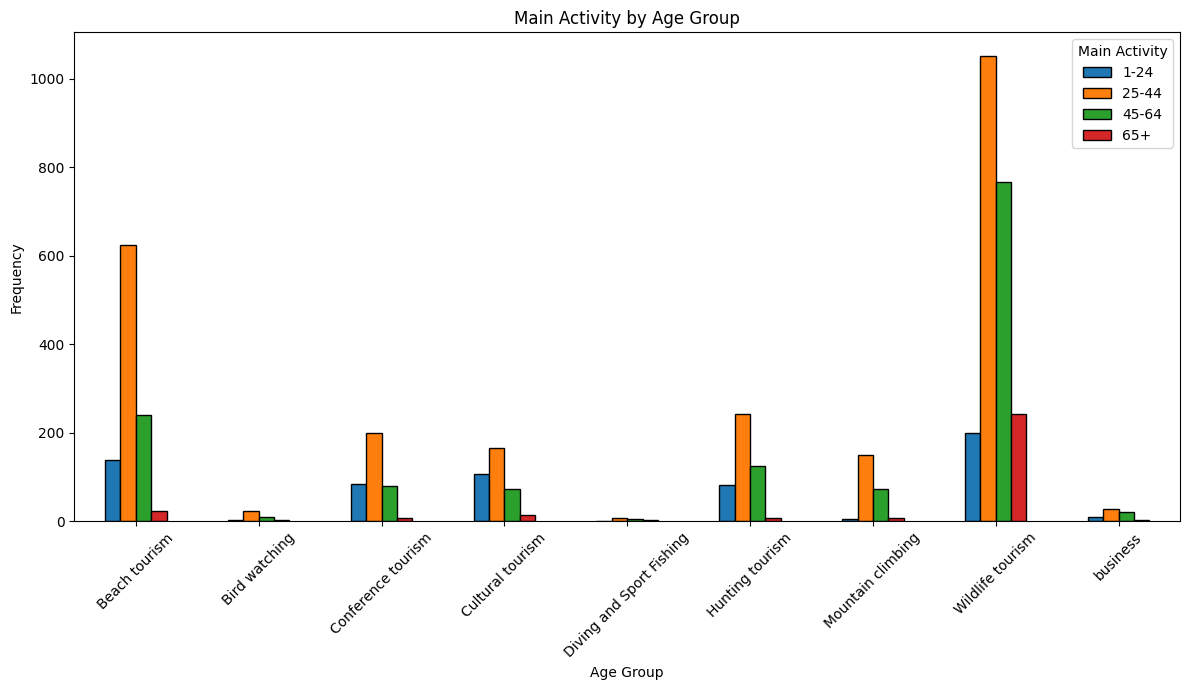

In [100]:
import matplotlib.pyplot as plt

# Creating a clustered bar chart
cross_tab.plot(kind='bar', figsize=(12, 7), edgecolor='black')

plt.title('Main Activity by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Main Activity')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()

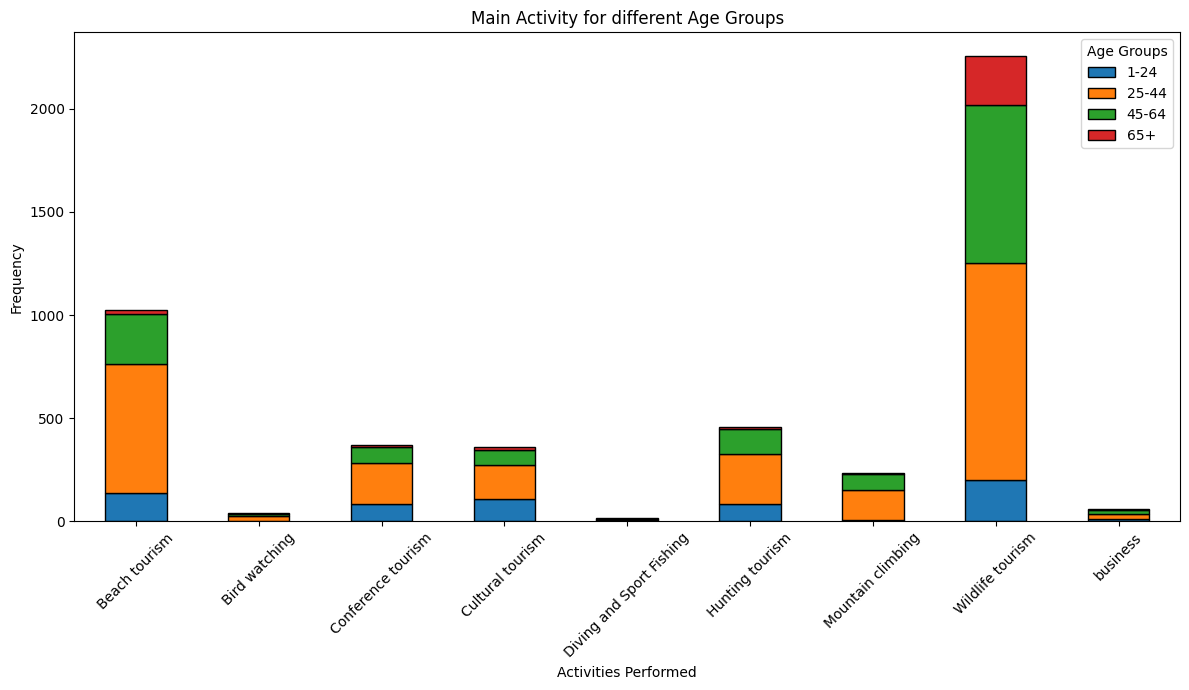

In [101]:
# Creating a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 7), edgecolor='black')

plt.title('Main Activity for different Age Groups')
plt.xlabel('Activities Performed')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Age Groups')
plt.tight_layout()

plt.show()

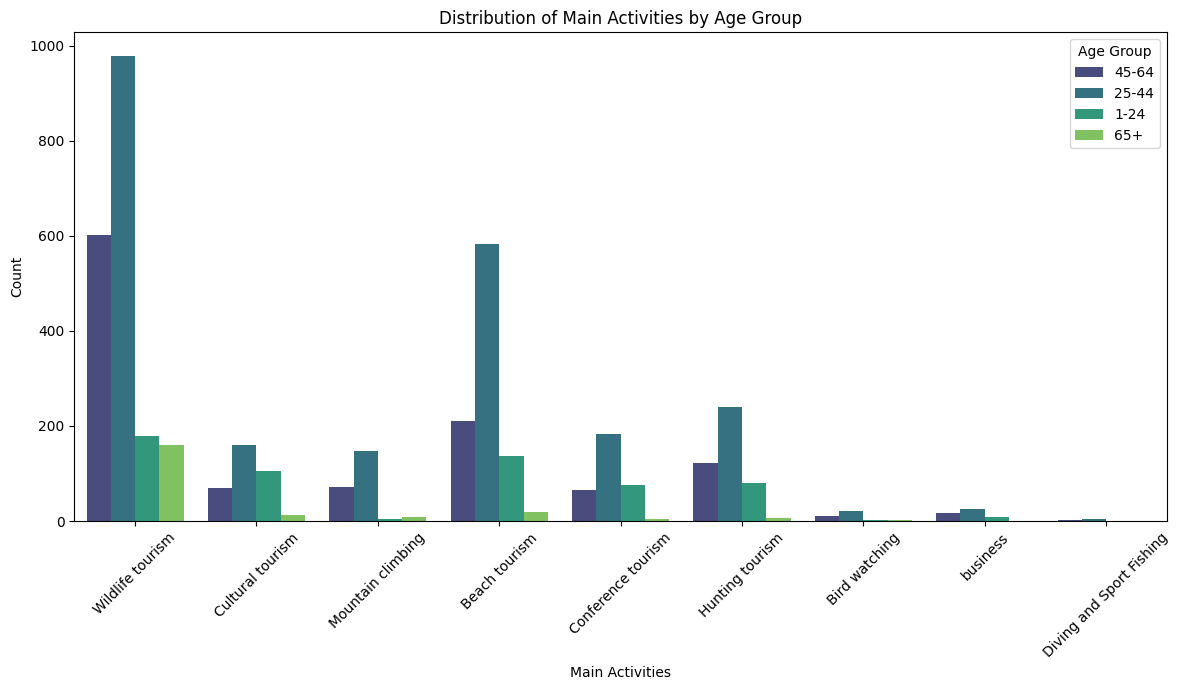

In [85]:
import seaborn as sns
import matplotlib.pyplot as pl

# Create a count plot
plt.figure(figsize=(12, 7))
sns.countplot(data=df_new, x='main_activity', hue='age_group', palette='viridis')

plt.title('Distribution of Main Activities by Age Group')
plt.xlabel('Main Activities')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Age Group', loc='upper right')  # Move the legend outside of the plot

plt.tight_layout()
plt.show()

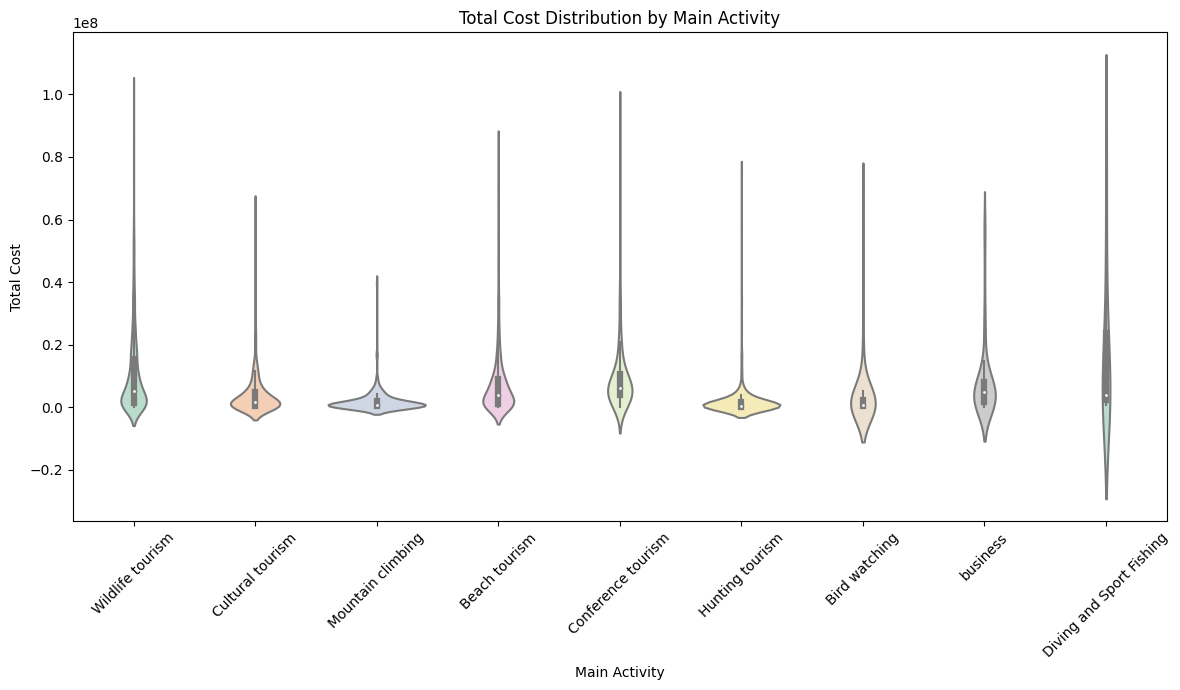

In [91]:
import seaborn as sns
import matplotlib.pyplot as pl

plt.figure(figsize=(12, 7))
sns.violinplot(data=df, x='main_activity', y='total_cost', palette='Pastel2')

plt.title('Total Cost Distribution by Main Activity')
plt.xlabel('Main Activity')
plt.ylabel('Total Cost')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

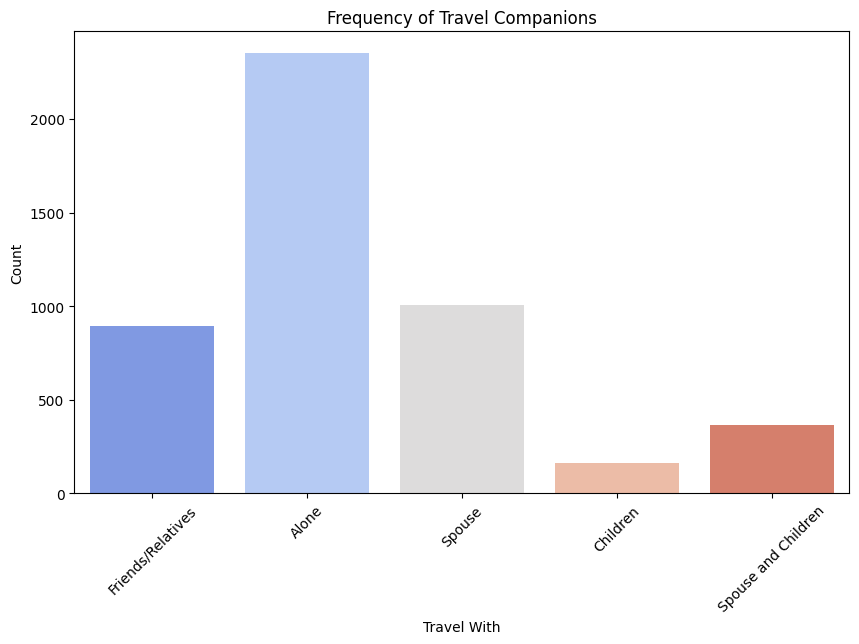

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='travel_with', palette='coolwarm')
plt.title('Frequency of Travel Companions')
plt.xlabel('Travel With')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

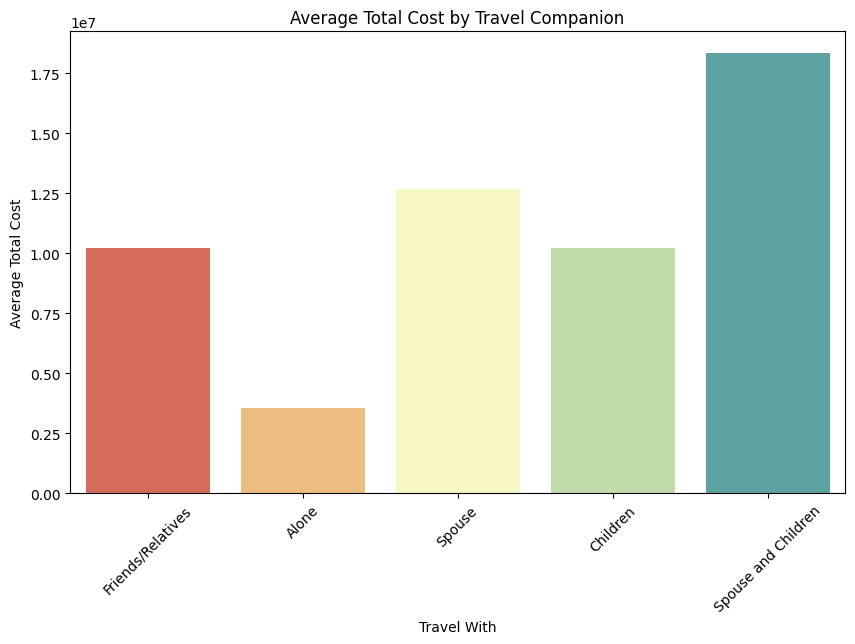

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='travel_with', y='total_cost', estimator=np.mean, ci=None, palette='Spectral')
plt.title('Average Total Cost by Travel Companion')
plt.xlabel('Travel With')
plt.xticks(rotation=45)
plt.ylabel('Average Total Cost')
plt.show()

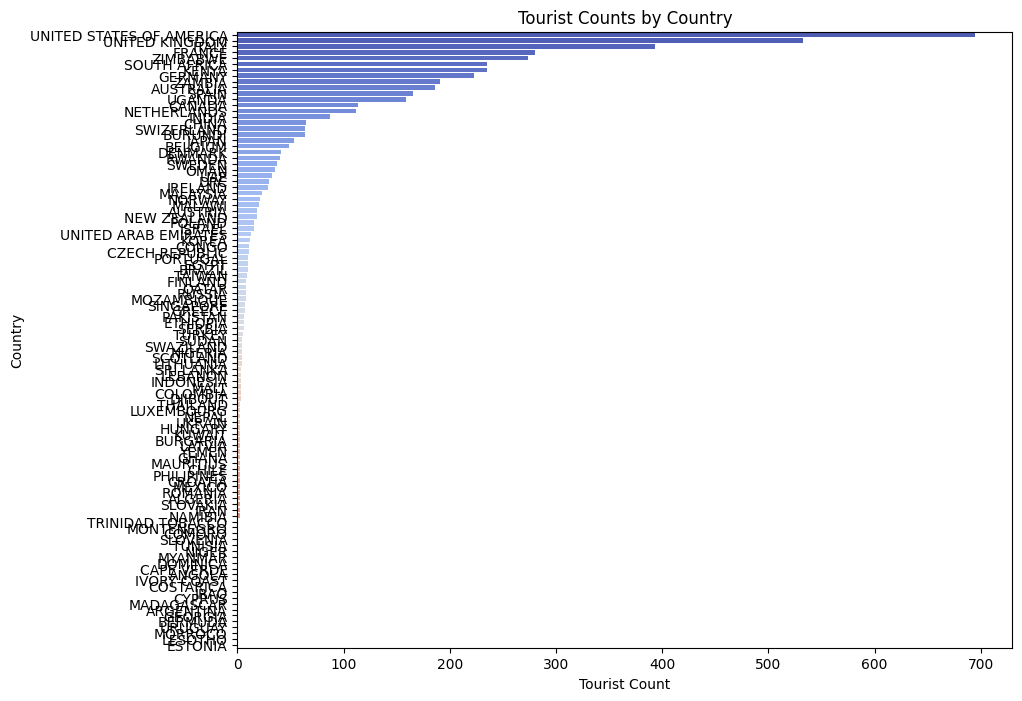

In [103]:
country_counts_sorted = country_counts.sort_values('Tourists', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=country_counts_sorted, y='Country', x='Tourists', palette='coolwarm')
plt.title('Tourist Counts by Country')
plt.xlabel('Tourist Count')
plt.ylabel('Country')
plt.show()

In [104]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [107]:
import folium
from folium.plugins import MarkerCluster

# Sample DataFrame 'df_countries' with country names and the count of tourists
# Replace this with your actual DataFrame
df_countries = pd.DataFrame({
    'Country': ['United States', 'France', 'Italy'],
    'Tourists': [100, 150, 200],
    'Latitude': [37.0902, 46.2276, 41.8719],
    'Longitude': [-95.7129, 2.2137, 12.5674]
})

# Creating a world map centered
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Adding a marker for each country in the DataFrame
for idx, row in df_countries.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Country']}: {row['Tourists']} tourists",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(world_map)

# Display the map
world_map